In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob

# pred_path = glob('./mask/*')
# for pred_p in pred_path:
#     pred_name = pred_p.split('/')[-1][5:]
#     print(pred_name)
#     pred = cv2.imread(pred_p,0)
#     kernel = np.ones((15,15),np.uint8)
#     kernel_3 = np.ones((11,11),np.uint8)

#     mask_c=pred.copy()
#     mask_c = np.array(mask_c, dtype=np.uint8)
#     # mask_c = cv2.morphologyEx(mask_c,cv2.MORPH_OPEN,kernel_3)
#     # mask_c = cv2.morphologyEx(mask_c,cv2.MORPH_OPEN,kernel_3)
#     mask_c =cv2.dilate(mask_c, kernel, iterations=3)
#     # mask = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)
#     # mask_cp = pred.copy()

#     # mask_c = cv2.cvtColor(mask_c, cv2.COLOR_BGR2GRAY)
#     ret, thr = cv2.threshold(mask_c,127,255,0)
#     contours,_ = cv2.findContours(thr, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#     print('contours길이:',len(contours))
#     if len(contours) > 1:
#     #     largest_area = 0
#     #     main_mask = np.zeros_like(mask_c)
#     #     area_list =[]
#     #     for cnt in contours:
#     #         area = cv2.contourArea(cnt)

#     #         if area > largest_area:
#     #             largest_area = area

#     #             image= cv2.drawContours(main_mask,[cnt], 0, (255,255,255),-1)
#     #             plt.imshow(image,'gray')
#         area_list = []        
#         ret, labels = cv2.connectedComponents(mask_c,labels=None, connectivity=None)
#         for i in range(ret):
#             mask = np.where(labels==i,1,0)
#             mask_area=mask.sum()
#             area_list.append([mask_area,mask])
#             largest_area = 0
#             for ar,m in area_list[1:]:
#                 if ar > largest_area:
#                     largest_area = ar
#     #                 plt.imshow(m*255,'gray')
#                     morph = m*255
#                     morph = morph.astype(np.uint8)
#                     pred = np.array(pred).astype(np.uint8)
#                     plt.imshow(morph,'gray')
#                     new_pred = cv2.bitwise_and(pred,morph)
                    
#                     plt.imshow(new_pred,'gray')
#                     plt.show()
#                     cv2.imwrite('./contour2pred/'+pred_name, new_pred)                
    
# #             mask_area=mask.sum()
# #             plt.imshow(mask*255,'gray')
# #             plt.show()
# #     max_v = max(area_list[0])
# #     print(max_v)

In [68]:
k=0
i=0
true_path = './gt'
pred_path = './contour2pred'
for true in os.listdir(true_path):
    for pred in os.listdir(pred_path):
        if true == pred :
            true_i = cv2.imread(os.path.join(true_path,true),0)
            pred_i = cv2.imread(os.path.join(pred_path,pred),0)
            
            dice=compute_dice_coefficient(true_i, pred_i)
            if dice == 0:
                continue
            i+=dice
            k+=1
            
print(i/k)

0.8836899379695734


In [64]:
def compute_dice_coefficient(mask_gt, mask_pred):
  """Computes soerensen-dice coefficient.

  compute the soerensen-dice coefficient between the ground truth mask `mask_gt`
  and the predicted mask `mask_pred`.

  Args:
    mask_gt: 3-dim Numpy array of type bool. The ground truth mask.
    mask_pred: 3-dim Numpy array of type bool. The predicted mask.

  Returns:
    the dice coeffcient as float. If both masks are empty, the result is NaN.
  """
  volume_sum = mask_gt.sum() + mask_pred.sum()
  if volume_sum == 0:
    return np.NaN
  volume_intersect = (mask_gt & mask_pred).sum()
  return 2*volume_intersect / volume_sum 

In [2]:
pred_path = glob('./mask/*')
gt_path = glob('./gt/*')
origin_path = glob('./origin/*')

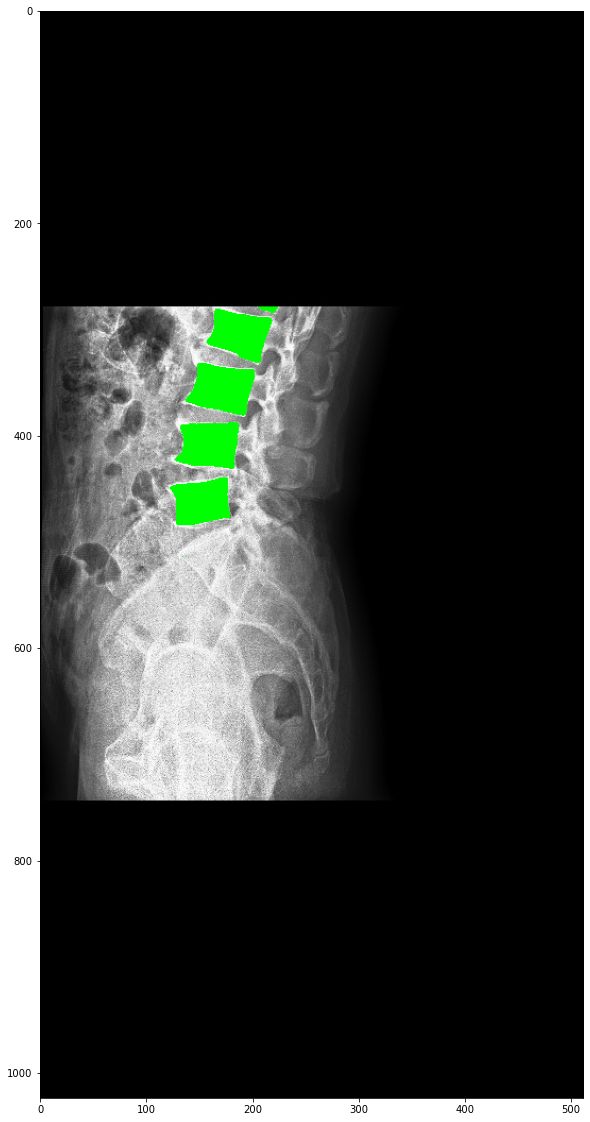

In [6]:
image = cv2.imread(origin_path[1])
mask = cv2.imread(pred_path[1],0)
mask = cv2.imread(gt_path[1],0)
# plt.figure(figsize=(20,20))
# plt.imshow(image,'gray')
image_c = image.copy()
mask_c=mask.copy()

image_c= cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(mask_c,127,255,0)
contours,_ = cv2.findContours(thr, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# for c in contours:
d = cv2.drawContours(image, contours, -1, (0,255,0), -1)
#     try:
#         M = cv2.moments(c)
#         cX = int(M["m10"] / M["m00"])
#         cY = int(M["m01"] / M["m00"])
#         print(cX,cY)
#         if cX>150 and cX<200:
#             d=cv2.circle(image, (cX,cY), 5, (255,0,0),-1)
#     except:
#         print('e')

plt.figure(figsize=(20,20))
plt.imshow(d)
# plt.show()

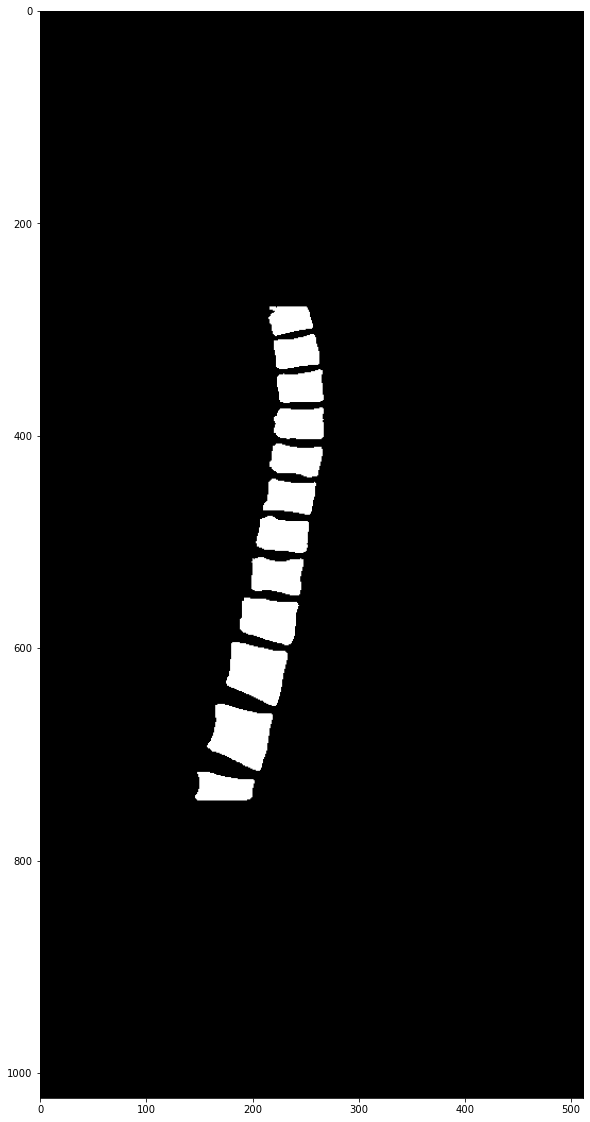

In [43]:

plt.figure(figsize=(20,20))
plt.imshow(mask,'gray')

In [13]:
image_path = glob('./spine/*')

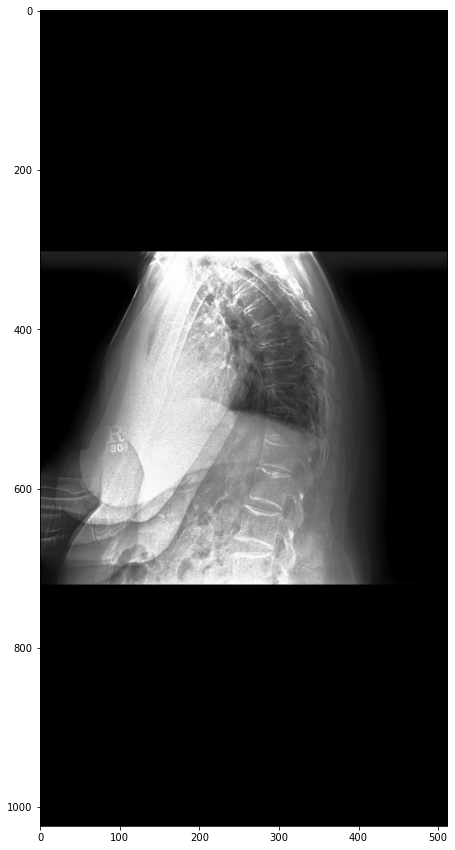

In [18]:
img = cv2.imread(image_path[0],0)
img = cv2.equalizeHist(img)

h,w = img.shape
bg_img = np.zeros((1024,512))
bg_msk = np.zeros((1024,512))

if w>h:
    x=512
    y=int(h/w *x)
else:
    y=1024
    x=int(w/h *y)

    if x >512:
        x =512
        y= int(h/w *x)

img_resize = cv2.resize(img, (x,y))
msk_resize = cv2.resize(mask, (x,y))

xs = int((512 - x)/2)
ys = int((1024-y)/2)
bg_img[ys:ys+y,xs:xs+x]=img_resize
bg_msk[ys:ys+y,xs:xs+x]=msk_resize
plt.figure(figsize=(15,15))
img = bg_img
mask = bg_msk
plt.imshow(img,'gray')

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob


In [11]:
mask= cv2.imread('16.png',0)
pred = cv2.imread('16_pred.png',0)

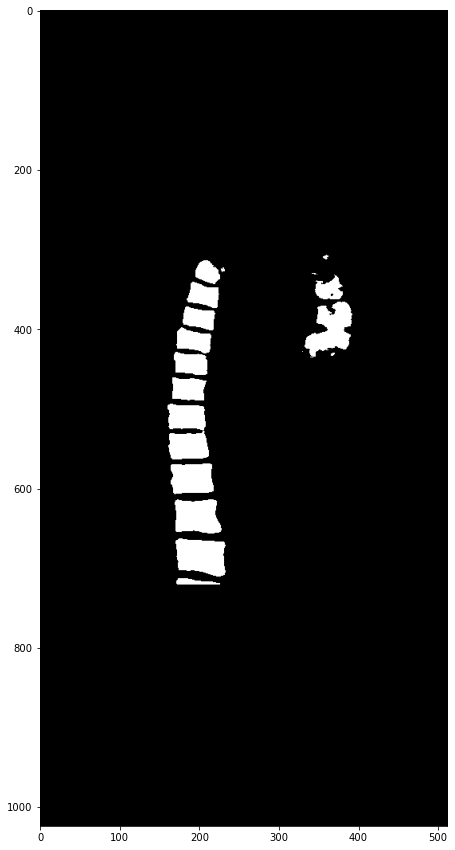

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(pred,'gray')

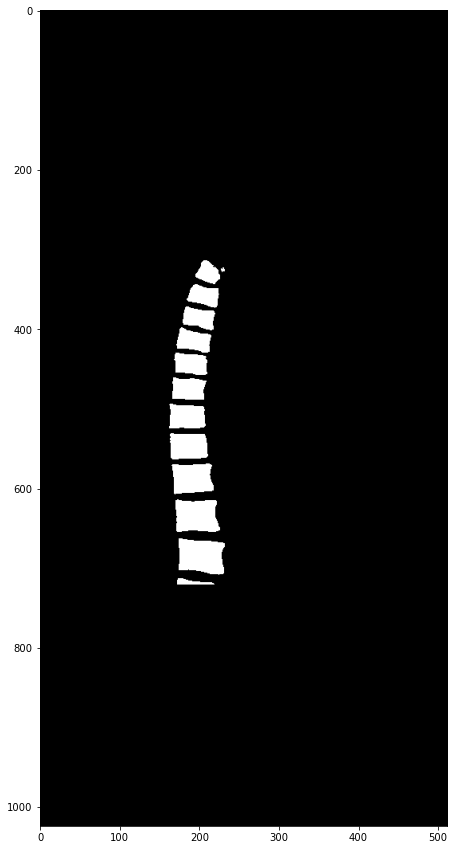

In [9]:
pred = cv2.bitwise_and(pred,mask)
plt.figure(figsize=(15,15))
plt.imshow(pred,'gray')